# The Probability Density Function (PDF) - Lab

## Introduction

In this lab we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to: 

* Calculate the PDF from given dataset containing real valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn


## Let's get started!

We'll import all the required libraries for you for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

#### Import the dataset 'weight-height.csv' as pandas dataframe . Calculate the mean and standard deviation for weights and heights for male and female individually. 

Hint : Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [2]:
data = None
male_df =  None
female_df =  None

  

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

In [3]:
data = pd.read_csv('weight-height.csv')
#male_df = [data.loc[i] for i in range(len(data)) if data.loc[i]["Gender"] == "Male"]
male_df  = data.iloc[:5000]
female_df =  data.iloc[5000:]

# data.describe(include='all')

#### Plot overlapping normalized histograms for male and female heights - use binsize = 10, set alpha level so that overlap can be visualized

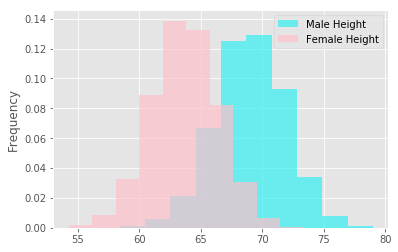

In [4]:
plt.hist(male_df.Height, bins = 10, label = 'Male Height', alpha = 0.7, color="#36f0f2", density=True)
plt.hist(female_df.Height, bins = 10, label = 'Female Height', alpha = 0.7, color="pink", density=True)
plt.ylabel ('Frequency')
plt.legend()
plt.show()

In [5]:
# Record your observations - are these inline with your personal observations?
#Seems accurate based on past observation men tend to be taller than women
# seems the median are accurate as we
# however, i'm sure women taller than 75in. exist



#### Write a function density() that takes in a random variable and calculates the density function using `np.hist` and interpolation. The function should return two lists carrying x and y coordinates for plotting the density functio

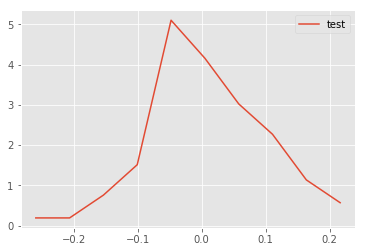

In [6]:
def density(x):
    n, bins = np.histogram(x, 10, density=1)
    # Initialize numpy arrays according to number of bins with zeros to store interpolated values
    # took this from the class readme
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)

    # Interpolate through histogram bins 
    # identify middle point between two neighbouring bins, in terms of x and y coords
    for k in range(n.size):
        pdfx[k] = .5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]
    return [pdfx, pdfy]




# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

#### Add Overlapping density plots for male and female heights to the histograms plotted earlier

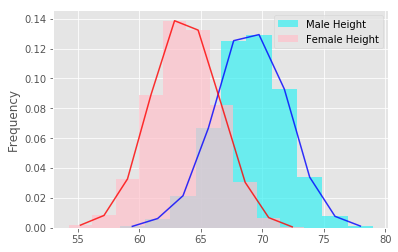

In [7]:
# You code here 
plt.hist(male_df.Height, bins = 10, label = 'Male Height', alpha = 0.7, color="#36f0f2", density=True)
plt.hist(female_df.Height, bins = 10, label = 'Female Height', alpha = 0.7, color="pink", density=True)
plt.ylabel ('Frequency')
x_m,y_m = density(male_df.Height)
x_f,y_f = density(female_df.Height)
plt.plot(x_m, y_m, color="blue", alpha=.8)
plt.plot(x_f, y_f, color="red", alpha=.8)
plt.legend()
plt.show()

#### Repeat above exerice for male and female weights

In [8]:
# Your code here 

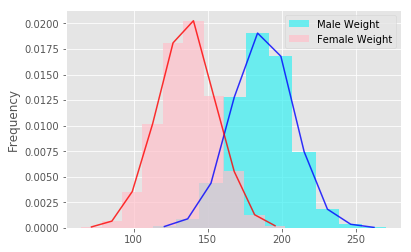

In [9]:
plt.hist(male_df.Weight, bins = 10, label = 'Male Weight', alpha = 0.7, color="#36f0f2", density=True)
plt.hist(female_df.Weight, bins = 10, label = 'Female Weight', alpha = 0.7, color="pink", density=True)
plt.ylabel ('Frequency')
x_m,y_m = density(male_df.Weight)
x_f,y_f = density(female_df.Weight)
plt.plot(x_m, y_m, color="blue", alpha=.8)
plt.plot(x_f, y_f, color="red", alpha=.8)
plt.legend()
plt.show()

#### Write your observations in the cell below.

In [10]:
# Record your observations - are these inline with your personal observations?
#Yes, men tend to be heavier than women
# So whats the takeaway when comparing male and female heights and weights 
# Men are generally bigger than womaen

#### Repeat Above experiments in seaborn and compare with your results. 

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


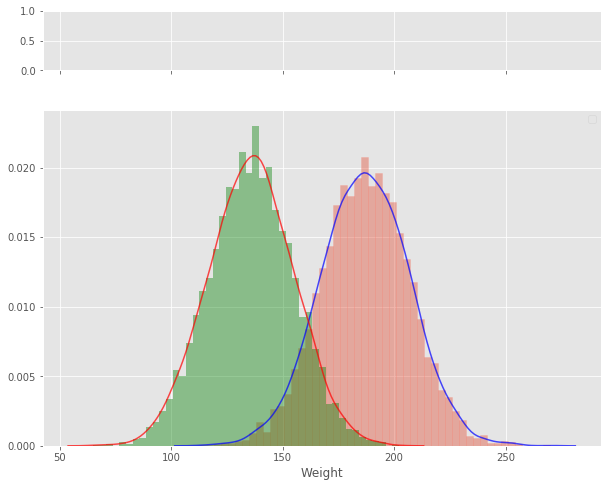

In [22]:
import scipy.stats as stats
import seaborn as sns

fig, (ax, ax2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, 
                              figsize = (10,8))

sns.distplot(male_df.Weight,  
             hist=True, hist_kws={
                                  "edgecolor" :'salmon',
                                  "alpha": 0.4
                                  },
             kde=True, kde_kws = {
                                  'color': "blue",
                                  "alpha": 0.7
                                 }
            )
sns.distplot(female_df.Weight,
             hist=True, hist_kws={
                                  "alpha": 0.4, 
                                  "color":  "green"
                                  },
             kde=True, kde_kws = {
                                  'color': "red",
                                  "alpha": 0.7
                                 }
            )
plt.legend()


Text(0.5,1,'Comparing Weights')

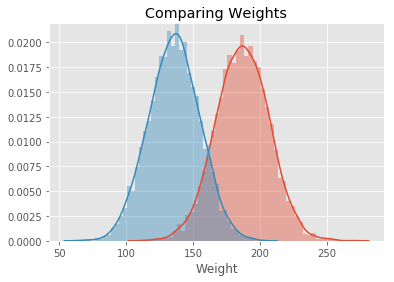

In [ ]:
# Your comments on the two approaches here. 
# are they similar ? what makes them different if they are ?

## Summary

In this lesson we saw how to build the probability density curves visually for given datasets and compare on the distribution visually by looking at the spread , center and overlap between data elements. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.